In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv("CAR DETAILS.csv")
df = pd.DataFrame(df)

In [3]:
df.shape

(4340, 8)

In [4]:
df.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner


In [5]:
car_brand = []
car_model = []
for i in  df['name']:
  car_brand.append(i.split(" ")[0])
  car_model.append(" ".join(i.split(" ")[1:]))

In [6]:
df['car_brand'] = car_brand
df['car_model'] = car_model

df = df.iloc[:,[8,9,1,3,4,5,6,7,2]]
df.head(2)

,car_brand,car_model,year,km_driven,fuel,seller_type,transmission,owner,selling_price
0,Maruti,800 AC,2007,70000,Petrol,Individual,Manual,First Owner,60000
1,Maruti,Wagon R LXI Minor,2007,50000,Petrol,Individual,Manual,First Owner,135000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   car_brand      4340 non-null   object
 1   car_model      4340 non-null   object
 2   year           4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
 8   selling_price  4340 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 305.3+ KB


In [8]:
models = []

for i in df.car_model:
  models.append(" ".join(i.split(" ")[:2]))

df.car_model = models #Changing the values of car_model column in dataframe

<ipython-input-8-e7771ceafe64>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.car_model = models #Changing the values of car_model column in dataframe


int64


Text(0, 0.5, 'Selling Price in Lakhs')

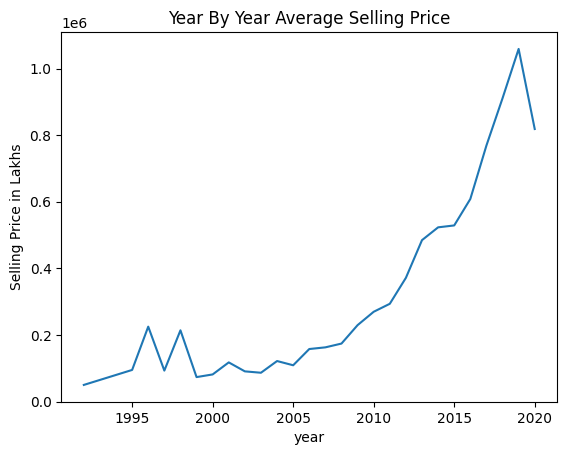

In [9]:
#@title Year by year average selling price of the cars:

print(df.selling_price.dtype)
data = df.groupby('year')['selling_price'].mean()
sns.lineplot(data)
plt.title("Year By Year Average Selling Price")
plt.ylabel("Selling Price in Lakhs")


Text(0.5, 1.0, 'Car Sold Year Wise')

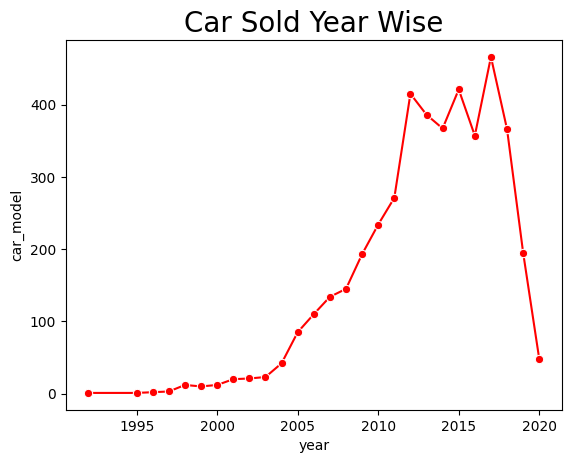

In [10]:
#@title Car sold year wise:
data = df.groupby('year')['car_model'].count()
sns.lineplot(data, marker='o', color='red')
plt.title("Car Sold Year Wise", fontsize= 20)

In [11]:
#@title 3 Top Selling Models:

model_num = df.car_model.value_counts()
Top3 = model_num.sort_values(ascending= False)[:3]
Top3


Wagon R        164
Swift Dzire    139
Grand i10      112
Name: car_model, dtype: int64

<ipython-input-12-57ab29039bb3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_data = df.corr()


<Axes: >

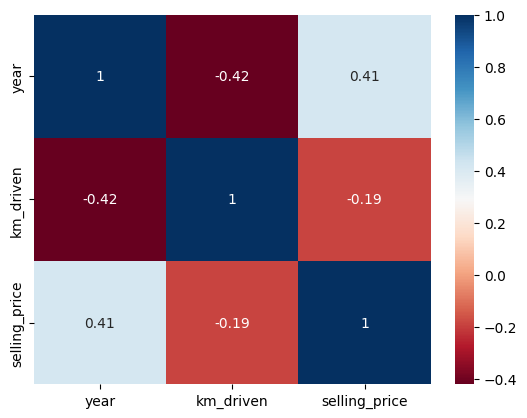

In [12]:
corr_data = df.corr()
sns.heatmap(corr_data, annot=True, cmap='RdBu')

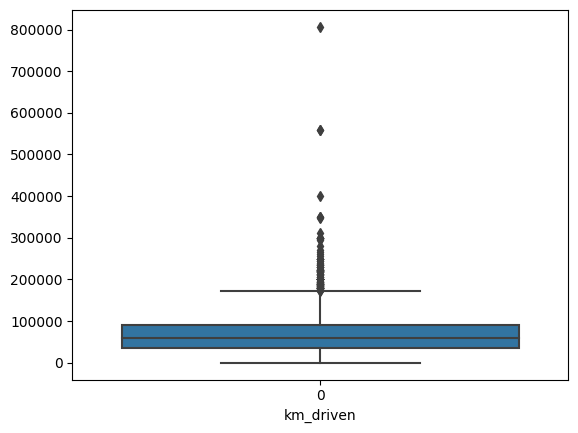

In [13]:
sns.boxplot(df['km_driven'])
plt.xlabel("km_driven")
plt.show()

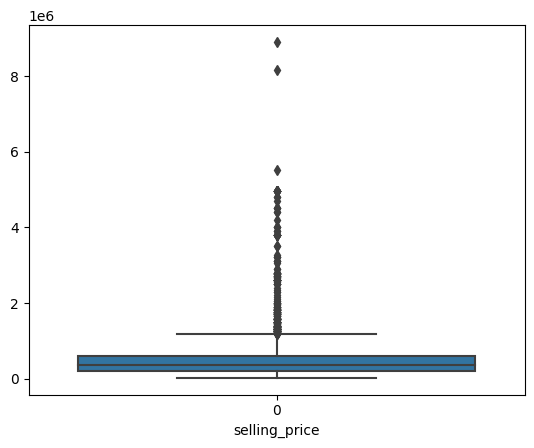

In [14]:
sns.boxplot(df['selling_price'])
plt.xlabel("selling_price")
plt.show()

# Data Preprocessing

In [15]:
#@title Outliers Removing Function

def remove(col):
  Q1 = col.quantile(0.25)
  Q3 = col.quantile(0.75)
  IQR = Q3-Q1
  upper_range = Q3 + (1.5*IQR)
  lower_range = Q1 - (1.5*IQR)

  for i in range(len(col)):
    if col[i] >upper_range:
      col[i]=upper_range
    elif col[i] < lower_range:
      col[i]=lower_range
    else: continue



In [16]:
#@title Removing Outliers

remove(df['km_driven'])
remove(df['selling_price'])
df.head(2)

<ipython-input-15-0a839f84fbad>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  col[i]=upper_range


,car_brand,car_model,year,km_driven,fuel,seller_type,transmission,owner,selling_price
0,Maruti,800 AC,2007,70000,Petrol,Individual,Manual,First Owner,60000.0
1,Maruti,Wagon R,2007,50000,Petrol,Individual,Manual,First Owner,135000.0


In [17]:
# Change the owner column
df.loc[df['owner'] == "Test Drive Car", "owner"]="other"
df.loc[df['owner'] == "Fourth & Above Owner", "owner"]="other"
df.loc[df['owner'] == "Third Owner", "owner"]="other"

In [18]:
df.owner.value_counts()

First Owner     2832
Second Owner    1106
other            402
Name: owner, dtype: int64

In [19]:
#@title Dataset Spliting

X = df.iloc[:, :-1]
Y = df.iloc[:, -1]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=1)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3472, 8)
(3472,)
(868, 8)
(868,)


In [20]:
df['seller_type'].value_counts()

Individual          3244
Dealer               994
Trustmark Dealer     102
Name: seller_type, dtype: int64

In [21]:
#@title Encoding::
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
ohe = OneHotEncoder()
ohe.fit(df[['fuel', 'seller_type', 'transmission', 'owner']])

ore = OrdinalEncoder()
ore.fit(df[['car_brand', 'car_model']])
# ore.categories_

ctg = list[df.car_model.unique()]

ct = ColumnTransformer(transformers=[
    ('transformer1', OneHotEncoder(categories= ohe.categories_), ['fuel', 'seller_type', 'transmission', 'owner']),   # passing columns by there index
    ('transformer2', OrdinalEncoder(categories=ore.categories_), ['car_brand', 'car_model'])
], remainder='passthrough')


#Model building

In [22]:
#@title Importing Regression models

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

#creating model objects
reg_lr = LinearRegression()
reg_ridge = Ridge()
reg_lasso = Lasso()
reg_dt = DecisionTreeRegressor()


In [23]:
ml_models = [reg_lr, reg_ridge, reg_lasso, reg_dt]

for i in range(len(ml_models)):
  print(f"{ml_models[i]}::::::::::::::")
  ml_model = ml_models[i]
  ml_model.fit(ct.fit_transform(x_train), y_train)
  print(f"{r2_score(y_test, ml_model.predict(ct.fit_transform(x_test)))}\n\n")

LinearRegression()::::::::::::::
0.5822631871149667


Ridge()::::::::::::::
0.5822984415634227


Lasso()::::::::::::::
0.5822693371525147


DecisionTreeRegressor()::::::::::::::
0.8188139520168051




/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.591e+13, tolerance: 3.302e+10
  model = cd_fast.enet_coordinate_descent(


## Checking the best model with random generated dataset

In [24]:
randomData = df.sample(20)
randomData.head(2)

,car_brand,car_model,year,km_driven,fuel,seller_type,transmission,owner,selling_price
3424,Maruti,Alto LXi,2009,40000,Petrol,Individual,Manual,First Owner,150000.0
1639,Maruti,Wagon R,2017,30000,Petrol,Individual,Manual,First Owner,350000.0


In [25]:
# Splitting Data
randX = randomData.iloc[:, :-1]
randY = randomData.iloc[:, -1]
print(randX.shape)
print(randY.shape)

(20, 8)
(20,)


In [26]:
randX_tr = ct.fit_transform(randX)

In [27]:
yPred = reg_dt.predict(randX_tr)
r2_score(randY, yPred)

0.989507512059352

**Decision Tree Regressor Model works pretty well for this project.**

#Saving the random dataset

In [28]:
randomData.to_csv("Sample20Dataset.csv")

In [29]:

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
ohe = OneHotEncoder()
ohe.fit(df[['fuel', 'seller_type', 'transmission', 'owner']])

ore = OrdinalEncoder()
ore.fit(df[['car_brand', 'car_model']])

CT = ColumnTransformer(transformers=[
    ('transformer1', OneHotEncoder(categories= ohe.categories_, handle_unknown='ignore'), [4,5,6,7]),   # passing columns by there index
    ('transformer2', OrdinalEncoder(categories=ore.categories_, handle_unknown='use_encoded_value', unknown_value=-1), [0,1])
], remainder='passthrough')



In [30]:
!pip install pipeline --q
import pipeline
pipe = make_pipeline(CT, reg_dt)

pipe.fit(x_train, y_train)
y_pred = pipe.predict(x_test)
r2_s = r2_score(y_test, y_pred)
print(r2_s)

0.8175936665132328


In [33]:
#@title Dumping pipe to Pickle file
import pickle
pickle.dump(pipe, open("modelPipe.pkl",'wb'))